In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import pandas_datareader as web
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Linkkt Algo Economics Financial Risk Hybrid Team/Warren Buffet/Holdings Data"

/content/drive/.shortcut-targets-by-id/1WzAzm95MVXB_iKsNHMU3ozAPEnyaEEvL/Linkkt Algo Economics Financial Risk Hybrid Team/Warren Buffet/Holdings Data


In [ ]:
df = pd.read_csv('AAL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-27,21.049999,21.400000,19.100000,19.299999,18.194910,961200
1,2005-09-28,19.299999,20.530001,19.200001,20.500000,19.326199,5747900
2,2005-09-29,20.400000,20.580000,20.100000,20.209999,19.052801,1078200
3,2005-09-30,20.260000,21.049999,20.180000,21.010000,19.806999,3123300
4,2005-10-03,20.900000,21.750000,20.900000,21.500000,20.268938,1057900


In [ ]:
df.shape

(3740, 7)

In [ ]:
df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3735,False,False,False,False,False,False,False
3736,False,False,False,False,False,False,False
3737,False,False,False,False,False,False,False
3738,False,False,False,False,False,False,False


Text(0, 0.5, 'close')

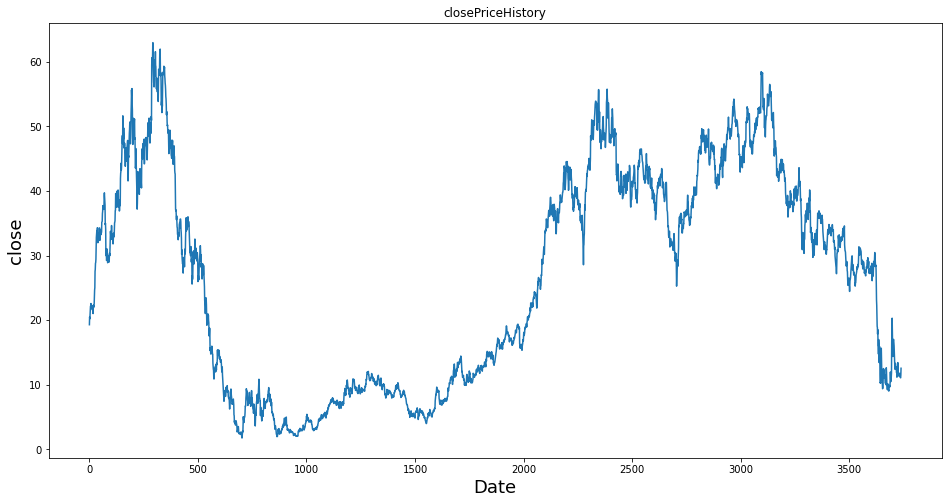

In [ ]:
plt.figure(figsize=(16,8))
plt.title('closePriceHistory')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close',fontsize=18)



In [ ]:
data = df.filter(['Close'])

In [ ]:
dataset=data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2992

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
scaled_data

array([[0.28664812],
       [0.30625919],
       [0.30151983],
       ...,
       [0.15231247],
       [0.15868606],
       [0.17649943]])

In [ ]:
train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.28664812, 0.30625919, 0.30151983, 0.31459388, 0.32260173,
       0.3333878 , 0.33404152, 0.34025167, 0.33322438, 0.33420491,
       0.33044615, 0.32685079, 0.32603364, 0.33518548, 0.3320804 ,
       0.3224383 , 0.32064061, 0.31475731, 0.33011928, 0.33583917,
       0.330773  , 0.33600261, 0.3399248 , 0.36182382, 0.374571  ,
       0.38012747, 0.42147407, 0.42670372, 0.44190225, 0.44402679,
       0.45219806, 0.4827586 , 0.50727241, 0.51626079, 0.52279783,
       0.52492238, 0.52034642, 0.53211308, 0.51135804, 0.49403496,
       0.50236966, 0.51119465, 0.50808952, 0.51724137, 0.50890671,
       0.52018303, 0.53145936, 0.53145936, 0.49991825, 0.52067329,
       0.52606636, 0.52132701, 0.52492238, 0.52296123, 0.51462656,
       0.51936592, 0.52083675, 0.54567742, 0.54731164, 0.54845562])]
[0.5679032101993264]



In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)


In [ ]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2932, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#model.add(LSTM(units = 50 , return_sequences = False))
#model.add(Dropout(0.2))
model.add(Dense(250))
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
92/92 [==============================] - 3s 31ms/step - loss: 0.0180
Epoch 2/100
92/92 [==============================] - 3s 31ms/step - loss: 0.0078
Epoch 3/100
92/92 [==============================] - 3s 31ms/step - loss: 0.0069
Epoch 4/100
92/92 [==============================] - 3s 32ms/step - loss: 0.0065
Epoch 5/100
92/92 [==============================] - 3s 32ms/step - loss: 0.0063
Epoch 6/100
92/92 [==============================] - 3s 31ms/step - loss: 0.0065
Epoch 7/100
92/92 [==============================] - 3s 32ms/step - loss: 0.0061
Epoch 8/100
92/92 [==============================] - 3s 31ms/step - loss: 0.0060
Epoch 9/100
92/92 [==============================] - 3s 32ms/step - loss: 0.0059
Epoch 10/100
92/92 [==============================] - 3s 32ms/step - loss: 0.0058
Epoch 11/100
92/92 [==============================] - 3s 32ms/step - loss: 0.0059
Epoch 12/100
92/92 [==============================] - 3s 32ms/step - loss: 0.0058
Epoch 13/100
92/92 [=====

In [ ]:
tested_data = scaled_data[training_data_len-60:,:]
x_test =[]
y_test =dataset[training_data_len:,:]

for i in range(60,len(tested_data)):
  x_test.append(tested_data[i-60:i,0])
  

In [ ]:
x_test = np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(748, 60, 1)

In [ ]:
predictions= model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

ValueError: ignored

In [ ]:
from sklearn. metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = math. sqrt(mse)
print(rmse)
rmse_1 = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse_1)

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(train['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close data USD',fontsize=18)
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [ ]:
valid

In [ ]:
test = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-23')
new = test.filter(['Close'])
last_60_days= new[-60:].values
last_60_days_Scaled = scaler.transform(last_60_days)
x_test=[]
x_test.append(last_60_days_Scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)   


In [ ]:
test_1 = web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-25')
print(test_1['Close'])